In [0]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline
data = pd.read_csv('/content/dataset_mtp_vineet.csv')
N = data.shape[0]
P = data.shape[1]
data = data.values


# Training and test data
train_start = 0
train_end = int(np.floor(0.7*N))
test_start = train_end
test_end = N
data_train = data[np.arange(train_start, train_end), :]
data_test = data[np.arange(test_start, test_end), :]


X_train = data_train[:,0:5]
y_train = data_train[:,5]
X_test = data_test[:,0:5]
y_test = data_test[:,5]


#import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior()


# Placeholders of input and output vectors 
X = tf.placeholder(dtype=tf.float32, shape=[None, P-1])
Y = tf.placeholder(dtype=tf.float32, shape=[None])

# Model architecture parameters
n_neurons_1 = 8
n_neurons_2 = 4
n_target = 1


# Initializers
sigma = 1
weight_initializer = tf.variance_scaling_initializer(mode="fan_avg", distribution="uniform", scale=sigma)
bias_initializer = tf.zeros_initializer()


# Layer 1: Variables for weights and biases of hidden layer 1
W_hidden_1 = tf.Variable(weight_initializer([P-1, n_neurons_1]))
bias_hidden_1 = tf.Variable(bias_initializer([n_neurons_1]))

#Layer 2: Variables for weights and biases of hidden layer 2
W_hidden_2= tf.Variable(weight_initializer([n_neurons_1, n_neurons_2]))
bias_hidden_2=tf.Variable(bias_initializer([n_neurons_2]))

# Output layer: Variables for output weights and biases
W_out = tf.Variable(weight_initializer([n_neurons_2, n_target]))
bias_out = tf.Variable(bias_initializer([n_target]))


# Hidden layer
hidden_1 = tf.nn.relu(tf.add(tf.matmul(X, W_hidden_1), bias_hidden_1))
hidden_2 = tf.nn.relu(tf.add(tf.matmul(hidden_1, W_hidden_2), bias_hidden_2))

# Output layer (Transposed)
out = tf.nn.sigmoid(tf.transpose(tf.add(tf.matmul(hidden_2, W_out), bias_out)))

# Cost function
mse = tf.reduce_mean(tf.squared_difference(out, Y))
cost = tf.reduce_mean(mse)

# Optimizer
opt = tf.train.AdamOptimizer().minimize(cost)



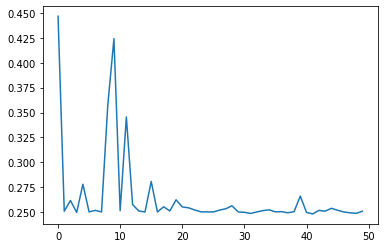

In [0]:
epoch_vs_mse=[]
for epochs in range(50):
  # Make Session
  net = tf.Session()
  # Run initializer
  net.run(tf.global_variables_initializer())


 
  # Number of epochs and batch size

  batch_size = 10
  #epochs=20
  for e in range(epochs):

      # Shuffle training data
      shuffle_indices = np.random.permutation(np.arange(len(y_train)))
      X_train = X_train[shuffle_indices]
      y_train = y_train[shuffle_indices]

      # Minibatch training
      for i in range(0, len(y_train) // batch_size):
          start = i*batch_size
          batch_x = X_train[start:start + batch_size]
          batch_y = y_train[start:start + batch_size]
          # Run optimizer with batch
          net.run(opt, feed_dict={X: batch_x, Y: batch_y})

          
  # Print final MSE after Training
  mse_final = net.run(mse, feed_dict={X: X_test, Y: y_test})
  epoch_vs_mse.append(mse_final)

# Setup interactive plot
plt.ion()
fig = plt.figure()
ax1 = fig.add_subplot(111)
line1, = ax1.plot(epoch_vs_mse)
plt.show()

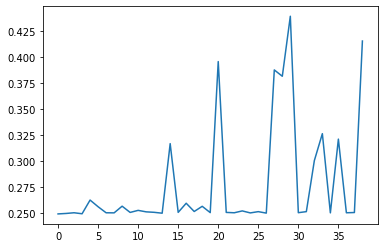

In [11]:
batch_vs_mse=[]
for batch_size in range(1,40):
  # Make Session
  net = tf.Session()
  # Run initializer
  net.run(tf.global_variables_initializer())


   # Number of epochs and batch size

  #batch_size = 10
  epochs=30
  for e in range(epochs):

      # Shuffle training data
      shuffle_indices = np.random.permutation(np.arange(len(y_train)))
      X_train = X_train[shuffle_indices]
      y_train = y_train[shuffle_indices]

      # Minibatch training
      for i in range(0, len(y_train) // batch_size):
          start = i*batch_size
          batch_x = X_train[start:start + batch_size]
          batch_y = y_train[start:start + batch_size]
          # Run optimizer with batch
          net.run(opt, feed_dict={X: batch_x, Y: batch_y})

          
  # Print final MSE after Training
  mse_final = net.run(mse, feed_dict={X: X_test, Y: y_test})
  batch_vs_mse.append(mse_final)

# Setup interactive plot
plt.ion()
fig = plt.figure()
ax1 = fig.add_subplot(111)
line1, = ax1.plot(batch_vs_mse)
plt.show()

In [0]:
df1 = pd.DataFrame(batch_vs_mse)

In [0]:
df1.to_csv('batch_vs_error.csv', index=False)

In [0]:
df2= pd.DataFrame(epoch_vs_mse)

In [0]:
df2.to_csv('epoch_vs_error.csv', index=False)